In [2]:
import glob
import pandas as pd
import pandas as pd
import matplotlib as plt
%matplotlib inline
import japanize_matplotlib

In [3]:
# 検証する通貨のデータを選択
currency = 'AUDJPY'
file = [i for i in glob.glob('../10minute_data/*.csv') if currency in i]
file

['../10minute_data\\AUDJPY_1646060455027.csv',
 '../10minute_data\\AUDJPY_1646157634896.csv',
 '../10minute_data\\AUDJPY_1646200835313.csv',
 '../10minute_data\\AUDJPY_1646244035757.csv',
 '../10minute_data\\AUDJPY_1646287234819.csv',
 '../10minute_data\\AUDJPY_1646330435550.csv',
 '../10minute_data\\AUDJPY_1646373635299.csv',
 '../10minute_data\\AUDJPY_1646416836015.csv',
 '../10minute_data\\AUDJPY_1646460036153.csv',
 '../10minute_data\\AUDJPY_1646503235233.csv',
 '../10minute_data\\AUDJPY_1646546434774.csv',
 '../10minute_data\\AUDJPY_1646589634993.csv',
 '../10minute_data\\AUDJPY_1646632835197.csv']

In [4]:
# データの結合
df_concat = pd.DataFrame()
for i in file:
    df = pd.read_csv(i,encoding='cp932')
    df_concat = pd.concat([df_concat,df])
df_concat.head()

,日付,始値,高値,安値,終値
0,2022年02月28日 07:20,83.110,83.166,83.031,83.065
1,2022年02月28日 07:30,83.054,83.054,82.944,82.950
2,2022年02月28日 07:40,82.950,82.972,82.803,82.844
3,2022年02月28日 07:50,82.844,82.937,82.806,82.909
4,2022年02月28日 08:00,82.913,82.987,82.689,82.806


In [5]:
df_concat.shape

(1300, 5)

In [6]:
df_concat.drop_duplicates(inplace=True)
df_concat.sort_values('日付',inplace=True)
df_concat.reset_index(inplace=True,drop=True)
df_concat.shape

(709, 5)

In [7]:
df_concat.tail()

,日付,始値,高値,安値,終値
704,2022年03月07日 14:20,85.274,85.299,85.212,85.231
705,2022年03月07日 14:30,85.230,85.239,85.177,85.209
706,2022年03月07日 14:40,85.209,85.218,85.156,85.191
707,2022年03月07日 14:50,85.191,85.237,85.182,85.209
708,2022年03月07日 15:00,85.209,85.209,85.197,85.203


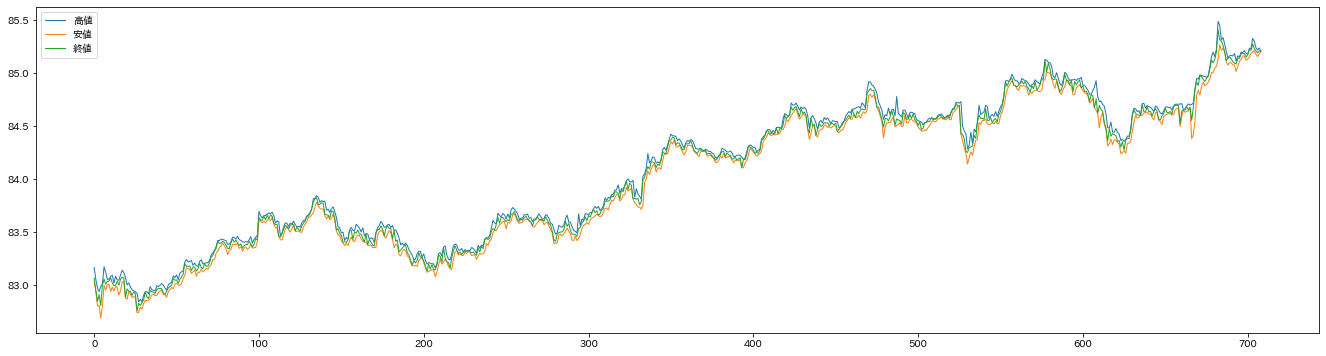

In [8]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_concat['高値'], linewidth=1, label="高値")
plt.pyplot.plot(df_concat['安値'], linewidth=1, label="安値")
plt.pyplot.plot(df_concat['終値'], linewidth=1, label="終値")
plt.pyplot.legend()
plt.pyplot.show()

In [9]:
df_2 = df_concat
df_2['devi_close_high'] = df_2['高値'] - df_2['終値']
df_2['devi_close_low'] = df_2['終値'] - df_2['安値']
df_2['devi_devi_'] = df_2['devi_close_high'] - df_2['devi_close_low']
df_2['0'] = 0
df_2['trend'] = df_2['終値'] - df_2['終値'].mean()

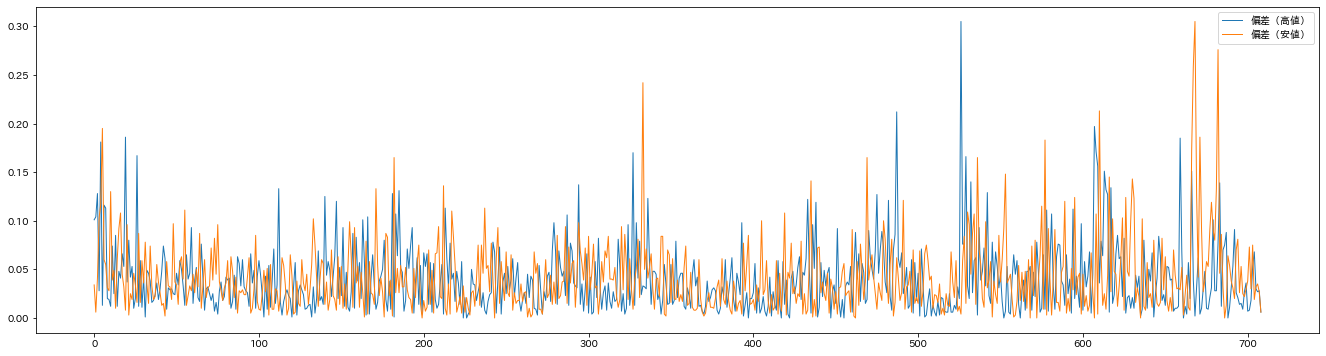

In [10]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['devi_close_high'], linewidth=1, label="偏差（高値）")
plt.pyplot.plot(df_2['devi_close_low'], linewidth=1, label="偏差（安値）")
plt.pyplot.legend()
plt.pyplot.show()

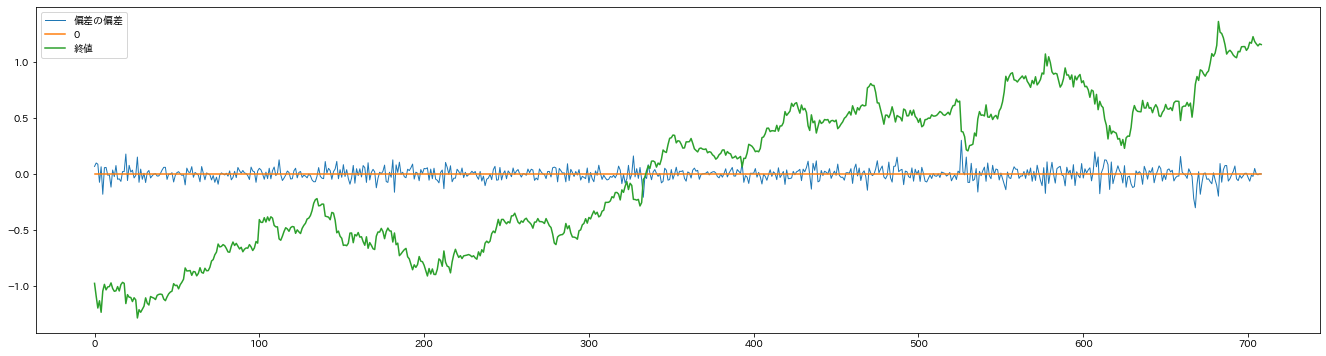

In [11]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['devi_devi_'], linewidth=1, label="偏差の偏差")
plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.legend()
plt.pyplot.show()

In [12]:
df_2['devi_close_high_mean'] = df_2['devi_close_high'].mean()
df_2['devi_close_low_mean'] = df_2['devi_close_low'].mean()

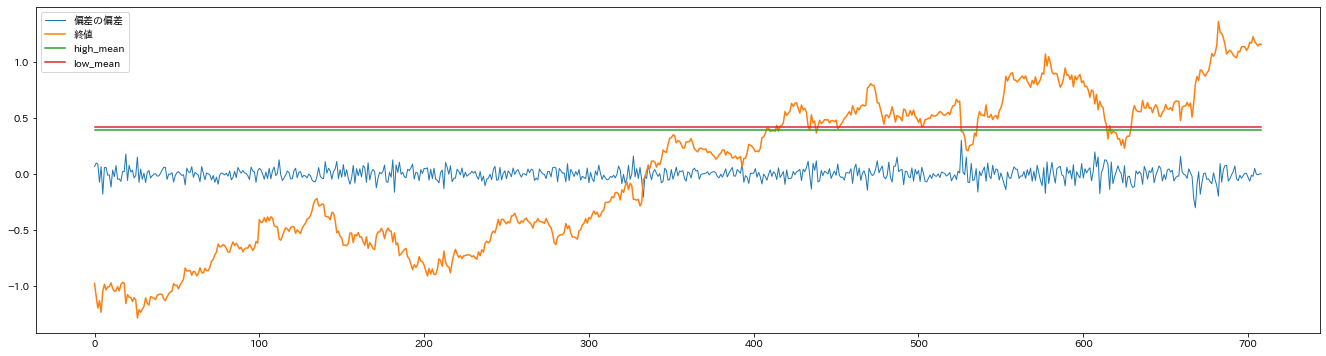

In [13]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['devi_devi_'], linewidth=1, label="偏差の偏差")
#plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.plot(df_2['devi_close_high_mean']*10, linewidth=1.5, label="high_mean")
plt.pyplot.plot(df_2['devi_close_low_mean']*10, linewidth=1.5, label="low_mean")
plt.pyplot.legend()
plt.pyplot.show()

In [14]:
df_2['deviation'] = df_2['高値'] - df_2['安値']
df_2['deviation'].mean()

0.08133427362482382

In [15]:
close_price = df_2['終値'].to_list()
check_flg = [0]
for i in range(1,len(close_price)):
    print(close_price[i],close_price[i-1],check_flg[i-1])
    if close_price[i]-0.05 > close_price[i-1]:
        check_flg.append(1)
    elif close_price[i]+0.05 < close_price[i-1]:
        check_flg.append(-1)
    else:
        check_flg.append(0)
df_2['flg'] = check_flg

82.95 83.065 0
82.844 82.95 -1
82.909 82.844 -1
82.806 82.909 1
82.996 82.806 -1
83.056 82.996 1
83.007 83.056 1
83.033 83.007 0
83.036 83.033 0
83.069 83.036 0
83.019 83.069 0
82.994 83.019 0
82.998 82.994 0
83.036 82.998 0
82.997 83.036 0
83.054 82.997 0
83.074 83.054 1
83.065 83.074 0
82.884 83.065 0
82.964 82.884 -1
82.941 82.964 1
82.939 82.941 0
82.902 82.939 0
82.936 82.902 0
82.917 82.936 0
82.755 82.917 0
82.829 82.755 -1
82.806 82.829 1
82.832 82.806 0
82.86 82.832 0
82.935 82.86 0
82.887 82.935 1
82.871 82.887 0
82.947 82.871 0
82.939 82.947 1
82.933 82.939 0
82.92 82.933 0
82.958 82.92 0
82.966 82.958 0
82.969 82.966 0
82.965 82.969 0
82.924 82.965 0
82.91 82.924 0
82.944 82.91 0
82.971 82.944 0
82.987 82.971 0
82.995 82.987 0
83.062 82.995 0
83.045 83.062 1
83.048 83.045 0
83.016 83.048 0
83.053 83.016 0
83.075 83.053 0
83.102 83.075 0
83.203 83.102 0
83.176 83.203 1
83.177 83.176 0
83.18 83.177 0
83.137 83.18 0
83.171 83.137 0
83.168 83.171 0
83.132 83.168 0
83.154 83.132

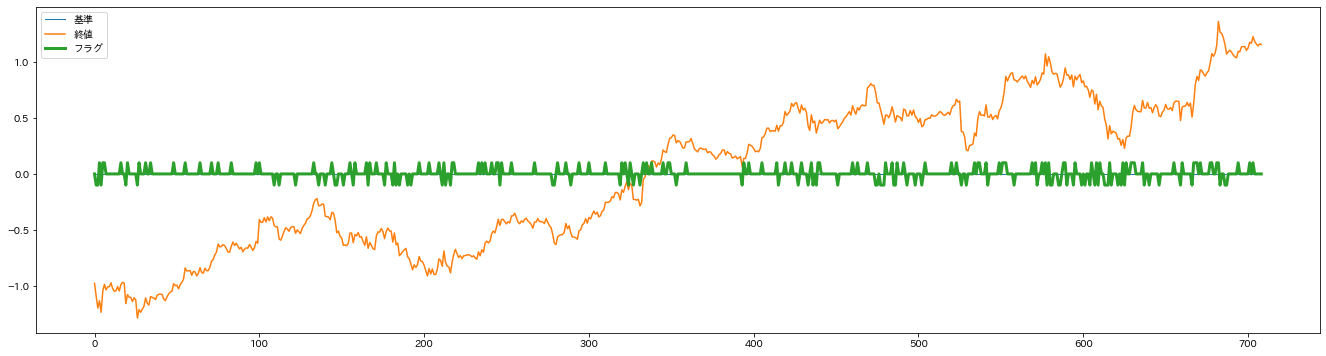

In [16]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['0'], linewidth=1, label="基準")
#plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.plot(df_2['flg']*0.1, linewidth=3, label="フラグ")
plt.pyplot.legend()
plt.pyplot.show()

In [17]:
cnt = 0
for i in check_flg:
    if i == 1 or i == -1:
        cnt += 1
cnt

196

In [29]:
high_price = df_2['高値'].to_list()
low_price = df_2['安値'].to_list()
counter,score,check,score2 = 0,0,0,0
counter_list = [0] * len(df_2)
check_list = [0] * len(df_2)
score_list = [0] * len(df_2)
check_flg2 = [0] * len(check_flg)
num_1 = 0.1
num_2 = 0.1
for index,value in enumerate(check_flg):
    if value == 1:
        check += 1
        check_list[index] = check
        counter_list[index] = counter
        score_list[index] = score
        counter2 = 0
        for i in range(index+1,len(df_2)):
            if high_price[i] >= close_price[index]+num_1:
                counter += 1
                score += 1
                counter2 += 1
                print(high_price[i], close_price[index])
                break
            if counter2 == 12:
                break
            elif low_price[i] >= close_price[index]-num_2:
                counter += 1
                score += -1
                counter2 + 
                break
    elif value == -1:
        check += 1
        check_list[index] = check
        counter_list[index] = counter
        score_list[index] = score
        for i in range(index+1,len(df_2)):
            if high_price[i] >= close_price[index]+num_1:
                counter += 1
                score2 += -1
                break
            elif low_price[i] >= close_price[index]-num_2:
                counter += 1
                score2 += +1
                break
    else:
        check_list[index] = check
        counter_list[index] = counter
        score_list[index] = score
        continue


83.009 82.909
83.172 82.996
83.37 83.257
83.611 83.51
83.678 83.572
84.241 84.072
84.918 84.815
84.696 84.538
84.926 84.779
85.007 84.898
84.618 84.477
84.618 84.46
84.85 84.677
84.949 84.848
85.153 85.036
85.487 85.197


195 -81 52 196


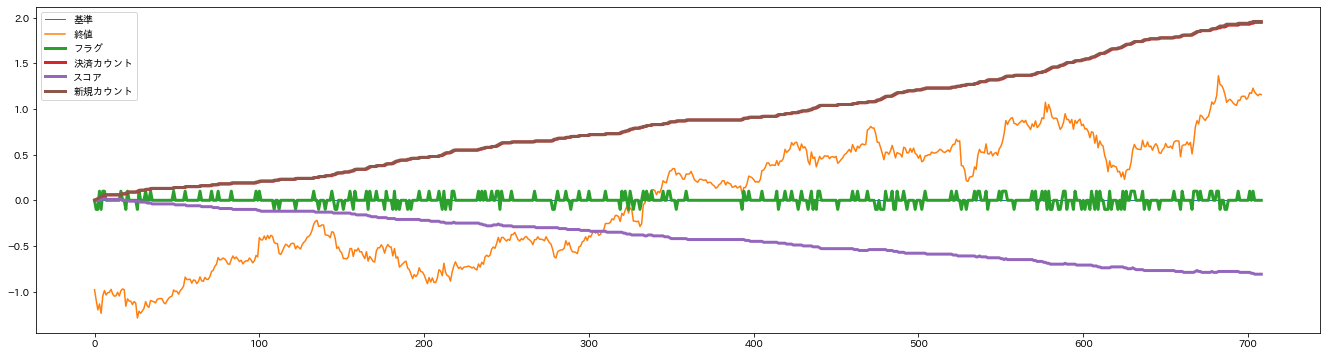

In [27]:
df_2['counter'] = counter_list
df_2 ['score'] = score_list
df_2['check'] = check_list
df_2['flg'] = check_flg
print(counter,score,score2,check) # counter=決済,check=新規注文,15
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['0'], linewidth=1, label="基準")
#plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.plot(df_2['flg']*0.1, linewidth=3, label="フラグ")
plt.pyplot.plot(df_2['counter']*0.01, linewidth=3, label="決済カウント")
plt.pyplot.plot(df_2['score']*0.01, linewidth=3, label="スコア")
plt.pyplot.plot(df_2['check']*0.01, linewidth=3, label="新規カウント")
plt.pyplot.legend()
plt.pyplot.show()

In [240]:
score_list


[0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -2,
 0,
 0,
 0,
 -3,
 0,
 0,
 -4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -5,
 0,
 0,
 0,
 0,
 0,
 0,
 -6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -7,
 0,
 0,
 0,
 0,
 0,
 0,
 -8,
 0,
 0,
 0,
 -9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -11,
 0,
 -12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -12,
 0,
 0,
 -12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -13,
 0,
 0,
 -13,
 0,
 0,
 0,
 -13,
 0,
 0,
 0,
 -14,
 0,
 0,
 -14,
 0,
 0,
 0,
 -14,
 0,
 0,
 0,
 -15,
 0,
 -15,
 -16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -17,
 -18,
 0,
 0,
 0,
 -19,
 0,
 0,
 0,
 0,
 -19,
 -20,
 0,
 0,
 0,
 -20,
 0,
 -21,
 0,
 -21,
 0,
 0,
 0,
 0,
 -21,
 0,
 -21,
 0,
 0,
 0,
 0,
 -22,
 0,
 0,
 0,
 0,
 0,
 -23,
 0,
 0,
 0,
 0,
 0,
 -24,
 0,
 -24,
 0,
 -25,
 0,
 0,
 -25,
 -24,
 -25,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
